<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/CHAPTER6%20%EC%B0%A8%EC%9B%90%20%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 차원 축소(Dimension Reduction) 개요**

**차원 축소**는 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소하여 테이터 세트를 새로운 차원으로 생성하는 방법입니다. 일반적으로 차원이 증가하면 데이터 포인트 간 거리가 기하급수적으로 멀어지고 희소(sparse)한 구조를 갖습니다. 피처 수백 개 이상을 가진 데이터 세트로는 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어지고 개별 피처 간 상관관계가 높을 가능성이 큽니다. 선형 모델에서는 입력 변수 간 상관관계가 높으면 [다중공선성(Multicollinearity)](https://terms.naver.com/entry.naver?docId=3404410&cid=40942&categoryId=32211) 때문에 예측 성능이 떨어집니다.

따라서 다차원 피처를 차원 축소 하여 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있고 학습 데이터 크기가 작아져서 학습에 필요한 처리 능력을 줄일 수 있습니다. 차원 축소는 **피처 선택(feature selection)**과 **피처 추출(feature extraction)**로 구현됩니다. 

- 피처 선택: 특정 피처에 종속성이 강한 피처는 제거하고 데이터 특징을 잘 나타내는 주요 피처만 선택합니다.

- 피처 추출: 기존 피처를 저차원의 중요 피처로 압축하여 추출합니다. 추출된 피처는 기존 피처와 다른 값이 됩니다. 기존 피처를 단순하게 압축하지 않고 함축적으로 잘 설명할 수 있는 또 다른 공간으로 매핑하여 추출합니다. 함축적인 특성 추출은 기존 피처가 전혀 인지하기 어려웠던 잠재적 요소를 추출하는 것을 의미합니다.

즉, 차원 축소를 수행하는 목적은 데이터를 더 잘 설명할 수 있는 잠재적 요소를 추출하는 것입니다. 큰 다차원을 가진 이미지, 텍스트에 매우 유용하게 활용됩니다.

먼저 이미지의 경우 함축적 차원 축소를 적용하여 잠재적 피처를 새 피처로 추출하고 함축적 형태의 이미지 변환과 압축을 수행합니다. 변환된 이미지는 원본 이미지보다 훨씬 적은 차원이므로 이미지 분류 작업을 수행할 때 과대적합 영향력이 작아지고 원본 데이터로 예측할 때보다 더 좋은 예측 성능을 기대할 수 있습니다. 이미지 자체가 가진 차원 수가 지나치게 커서 비슷한 이미지라도 적은 픽셀 차이만으로 잘못 예측하게 할 수 있습니다.

텍스트의 경우 차원 축소를 통해 텍스트 문서 내에 숨겨진 의미를 추출합니다. 문서 내 단어들의 구성에 숨겨진 시맨틱(Semantic) 의미나 토픽(Topic)을 잠재 요소로 간주하고 찾아낼 수 있습니다. **SVD**, **NMF**가 이 시맨틱 토픽(Semantic Topic) 모델링을 위한 기반 알고리즘으로 사용됩니다.

# **2. PCA(Principal Component Analysis)**

## **2.1. PCA 개요**

**PCA(주성분 분석)**는 여러 변수 간에 존재하는 상관관계를 이용하여 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소하는 기법입니다. PCA로 차원을 축소할 때 기존 데이터의 정보 유실이 최소화됩니다. 가장 높은 분산을 가지는 데이터 축을 찾아서 차원을 축소하는데 이것이 PCA의 주성분입니다. 가장 높은 분산은 데이터의 특성을 가장 잘 나타내는 것으로 간주합니다.

PCA는 먼저 가장 큰 데이터 변동성(Variance)을 기반으로 첫 번째 벡터 축을 생성하고 두 번째 축은 이 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 합니다. 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성합니다. 이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터의 차원이 축소됩니다. 이처럼 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있습니다.

이 외 자세한 설명은 본서를 참고하시기 바랍니다. 생략한 내용의 핵심은 입력 데이터의 공분산 행렬이 고유벡터와 고윳값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용하여 입력 데이터를 선형 변환하는 방식이 PCA라는 것입니다. PCA는 아래 스텝으로 수행됩니다.

1. 입력 데이터 세트의 공분산 행렬을 생성합니다.

1. 공분산 행렬의 고유벡터와 고윳값을 계산합니다.

1. 고윳값이 가장 큰 순으로 K개(PCA 변환 차수)만큼 고유벡터를 추출합니다.

1. 고윳값이 가장 큰 순으로 추출된 고유벡터를 이용하여 새롭게 입력 데이터를 변환합니다.

붓꽃 데이터를 활용하여 설명을 이어가겠습니다. 붓꽃 데이터가 가진 피처 4개를 2개로 압축해 보겠습니다.

In [12]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


각 피처를 시각화해 보겠습니다. 'sepal_length'를 X축, 'sepal_width'를 y축으로 지정하겠습니다.

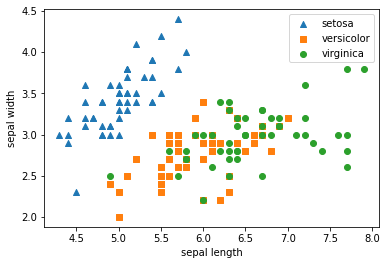

In [13]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target'] == i]['sepal_length']
    y_axis_data = irisDF[irisDF['target'] == i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

PCA는 여러 피처의 값을 연산해야 하므로 속성 스케일에 영향을 받습니다. 먼저 피처 스케일링 작업을 수행하겠습니다.

In [14]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

PCA를 적용하여 2차원으로 변환하겠습니다. 

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


데이터프레임으로 변환하여 2차원 데이터를 확인하겠습니다.


In [16]:
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


시각화 해보겠습니다. X축은 주성분 1, y축은 주성분 2입니다.

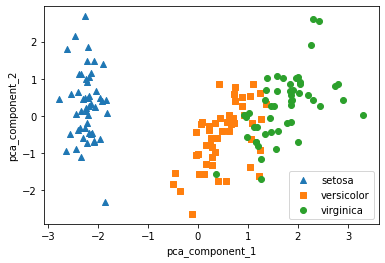

In [17]:
makers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target'] == i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

비교적 잘 구분된 형태입니다.

주성분 별로 원본 데이터의 변동성을 반영하는 비율을 확인해 보겠습니다.

In [18]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


주성분 1은 약 72.9%, 주성분 2는 약 22.8%만큼 변동성을 가집니다. 원본 데이터의 변동성을 95%만큼 설명한다고 볼 수 있습니다. 

원본 데이터 세트와 PCA로 변환된 데이터 세트의 분류 결과를 비교해 보겠습니다.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [22]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88




---

정리 중

---



# **3. LDA(Linear Discriminant Analysis)**

## **3.1. LDA 개요**

## **3.2. 붓꽃 데이터 세트에 LDA 적용하기**

# **4. SVD(Singular Value Decomposition)**

## **4.1. SVD 개요**

## **4.2. 사이킷런 TruncatedSVD 클래스를 이용한 변환**

# **5. NMF(Non-Negative Matrix Factorization)**

## **5.1. NMF 개요**

# **6. 정리**